In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import missingno as mno
plt.style.use('fivethirtyeight')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv("Iris(1).csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# No use with the ID column ,let's drop it
df.drop('Id',axis=1,inplace=True)

In [8]:
# Checking the data after removing the ID column
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


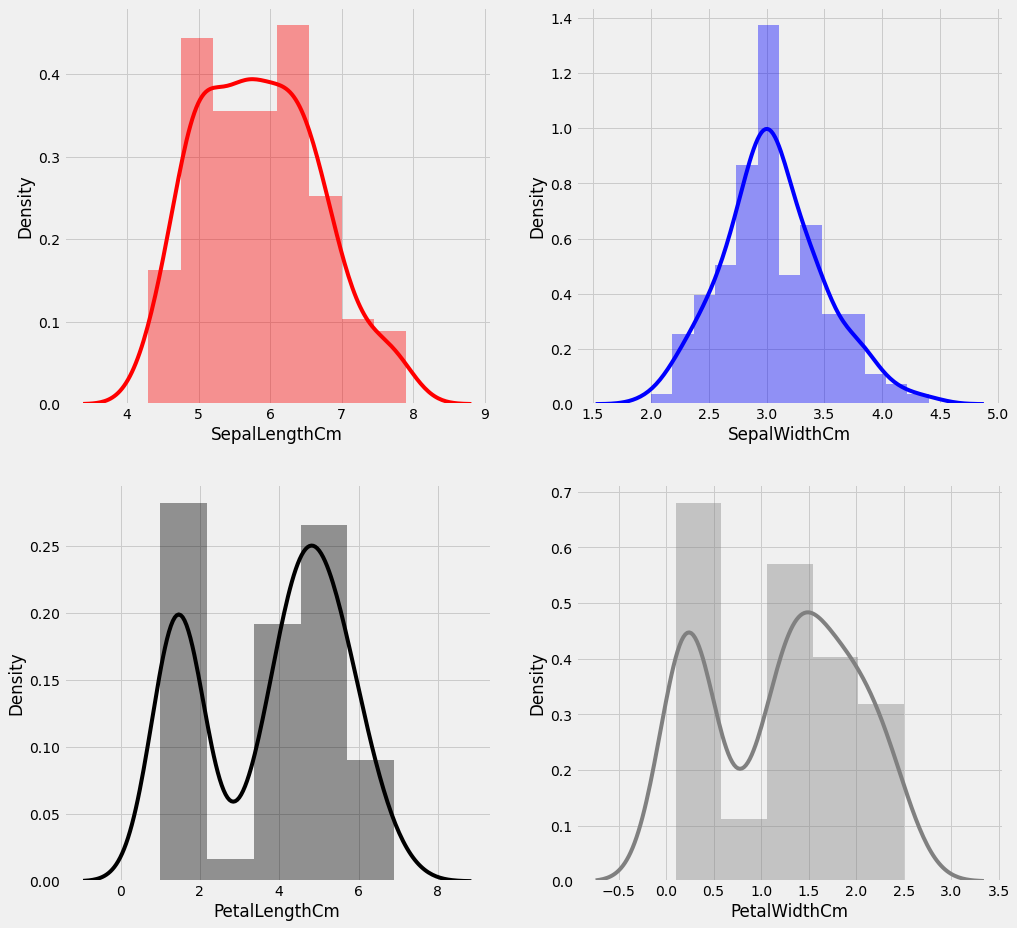

In [27]:
# let's check the distribution of the numerical columns
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.distplot(df['SepalLengthCm'],color='red',)
plt.subplot(2,2,2)
sns.distplot(df['SepalWidthCm'],color='blue')
plt.subplot(2,2,3)
sns.distplot(df['PetalLengthCm'],color='black')
plt.subplot(2,2,4)
sns.distplot(df['PetalWidthCm'],color='grey')
plt.show()

In [28]:
# As we see that most of the Sepal values are in Normal Distribution

No handles with labels found to put in legend.


<Figure size 720x720 with 0 Axes>

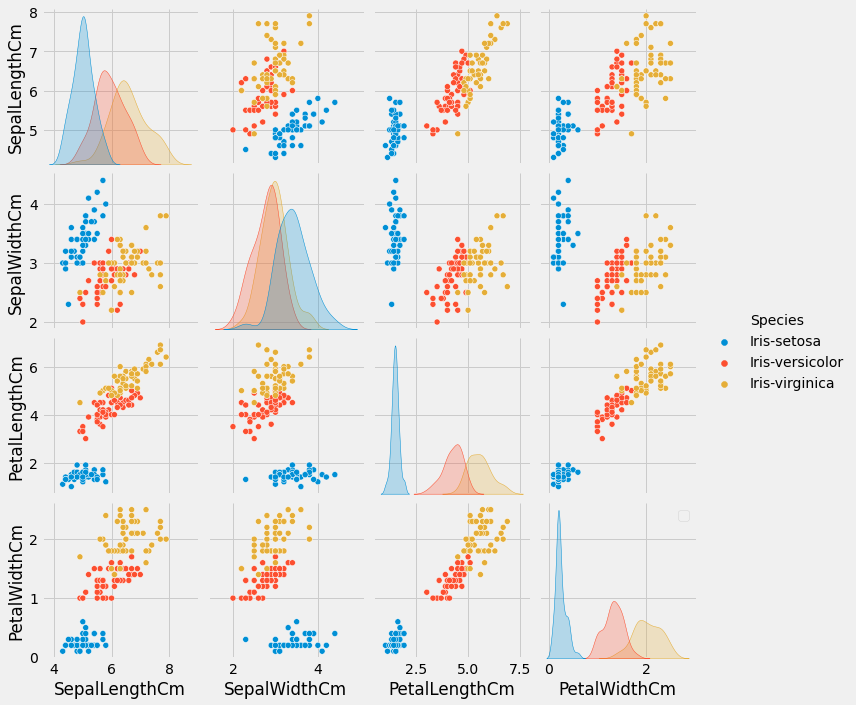

In [38]:
# Let's see the Pair plot with the Data
plt.figure(figsize=(10,10))
sns.pairplot(df,hue='Species')
plt.legend()
plt.show()

In [39]:
unique_species = df['Species'].unique()

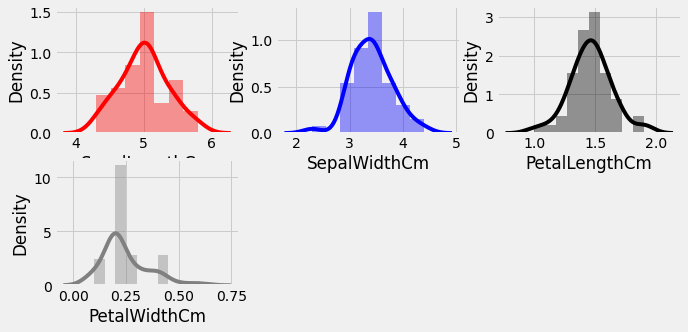

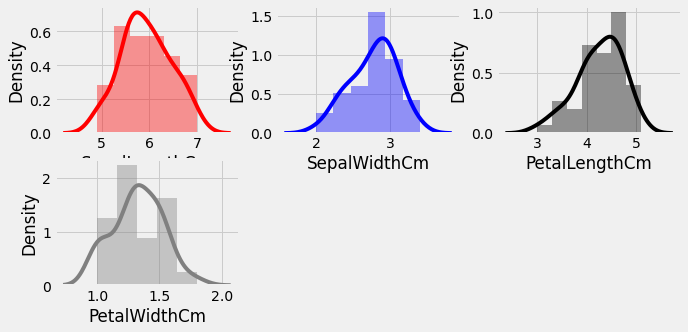

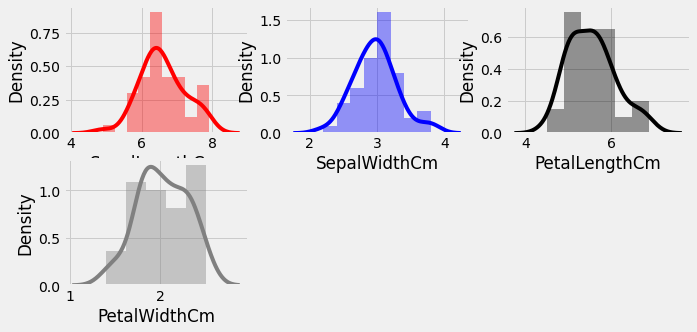

In [46]:
for species in unique_species:
    species_df = df[df["Species"] == species]
    plt.figure(figsize=(10,10))
    plt.subplot(4,3,1)
    sns.distplot(species_df['SepalLengthCm'],color='red',)
    plt.subplot(4,3,2)
    sns.distplot(species_df['SepalWidthCm'],color='blue')
    plt.subplot(4,3,3)
    sns.distplot(species_df['PetalLengthCm'],color='black')
    plt.subplot(4,3,4)
    sns.distplot(species_df['PetalWidthCm'],color='grey')
    plt.show()

In [47]:
# Let's make the Target Column

In [53]:
# creating a dictionary with the unique species names and an alternative value for them
unique_species = df['Species'].unique()
dmap = {i:k for k,i in enumerate(unique_species,0)}

In [51]:
# Mapping the Species column with the custom Dictionary which is "dmap"
df['Species'] = df['Species'].map(dmap)

In [54]:
# Checking the DAta after the Species column transformation
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [55]:
# Let's check the class imbalance 
df["Species"].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [75]:
# Let's Create the Target and Features Variables
X = df.drop('Species',axis=1)
y = df['Species']

In [76]:
# As we see all the classes have the same data.

In [77]:
# Let's Split the data into train and test .
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [83]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
# Creating an object with Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
preds = tree.predict(X_test)

[Text(289.10769230769233, 433.2342857142857, 'X[3] <= -0.51\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(216.83076923076925, 366.58285714285716, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(361.3846153846154, 366.58285714285716, 'X[2] <= 0.586\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(144.55384615384617, 299.93142857142857, 'X[3] <= 0.623\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(72.27692307692308, 233.28000000000003, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(216.83076923076925, 233.28000000000003, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(578.2153846153847, 299.93142857142857, 'X[3] <= 0.756\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(361.3846153846154, 233.28000000000003, 'X[2] <= 0.701\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(289.10769230769233, 166.62857142857143, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(433.6615384615385, 166.62857142857143, 'X[3] <= 0.49\ngini = 0.44

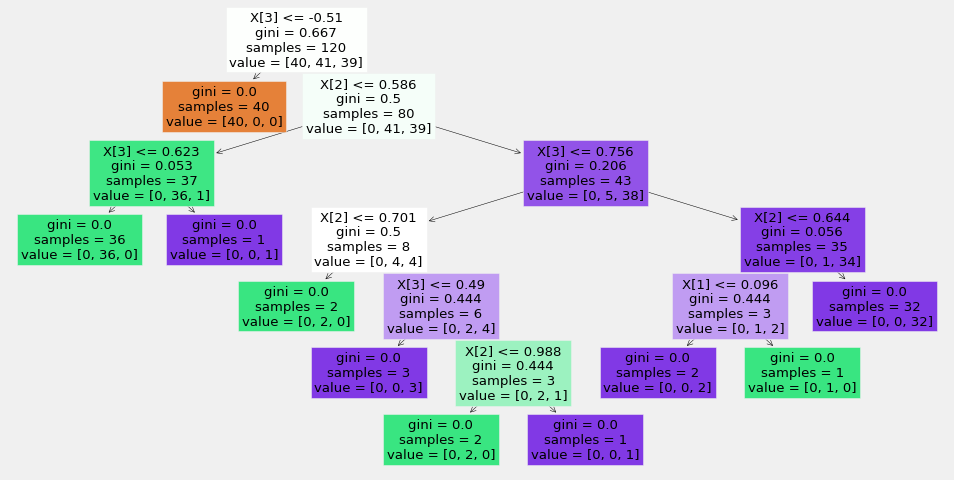

In [102]:
plt.figure(figsize=(15,8))
plot_tree(tree,filled=True)

In [86]:
print(accuracy_score(y_test,preds))

1.0


In [87]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [88]:
print(confusion_matrix(y_test,preds))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


<AxesSubplot:>

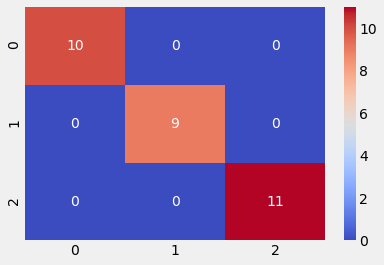

In [92]:
con_mat = confusion_matrix(y_test,preds)
sns.heatmap(con_mat,cmap='coolwarm',annot=True)

In [93]:
path = tree.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas,impurities = path.ccp_alphas,path.impurities

In [94]:
ccp_alphas

array([0.        , 0.00809524, 0.01111111, 0.01111111, 0.01621622,
       0.0241196 , 0.24326537, 0.33340278])

In [95]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)

<Figure size 1440x1440 with 0 Axes>

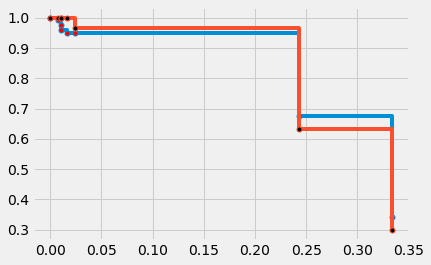

In [98]:
train_score = [clf.score(X_train,y_train)for clf in clfs]
test_score = [clf.score(X_test,y_test)for clf in clfs]
plt.figure(figsize=(20,20))
fig,ax = plt.subplots()
ax.plot(ccp_alphas,train_score,drawstyle='steps-post',marker='o',markersize=5,markerfacecolor='red')
ax.plot(ccp_alphas,test_score,drawstyle='steps-post',marker='o',markersize =5,markerfacecolor ='black')
plt.show()

In [100]:
clf = DecisionTreeClassifier(ccp_alpha=0.025)
clf.fit(X_train,y_train)
preds = clf.predict(X_test)
print(accuracy_score(y_test,preds))
print(classification_report(y_test,preds))
print(confusion_matrix(y_test,preds))

0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
